In [1]:
## python v3.7.5
import pandas as pd # 1.1.5
import numpy as np # 1.21.6
from matplotlib_venn import venn2, venn3, venn3_circles
import matplotlib # 3.5.3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
import scipy.stats as st


2397


,fixed_signif_metG,fixed_signif_hipA7,fixed_signif_WT_d6
Row.names,,,
lon,True,False,False
yqgE,True,False,False
mdtK,True,False,False
rmf,True,True,False
cysK,True,True,False
yhaM,True,True,False
hipA,False,True,False
ssrA,True,True,True
ompC,True,True,True


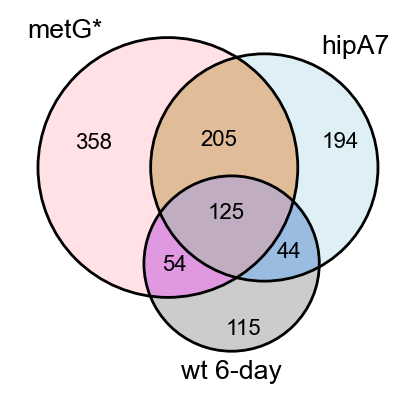

In [2]:
## read in differential expression data; assign significance (1=over-represented, -1=under-reprented; 0=neither)
## merge data for metG*, hipA7, and 6-day wildtype in loop; all vs. cells in tetracycline (persister cluster only)
FDR=0.1
merged = pd.DataFrame()
for id1 in ['metG','hipA7','WT_d6']:
    filename = 'source_data/generated/' + id1 + '_vs_tet_markers_for_fig3.txt' # saved in fig3_persister_only.R
    table = pd.read_csv(filename,sep='\t',index_col=0)
    table.index = table['Row.names']
    table = table.drop('Row.names',axis=1)
    table['less'] = -table['less']
    signed_p = []
    for h,l in zip(table['greater'],table['less']):
        if abs(h)<=abs(l):
            signed_p.append(h + (10**-300))
        elif abs(l)<abs(h):
            signed_p.append(l - (10**-300))
        else:
            print('error')
    table['signed_p'] = signed_p
    table['fixed_signif'] = (abs(table['signed_p']).sort_values()<FDR*np.arange(1,len(table)+1)/len(table)).astype(int)
    table['fixed_signif'] = (table['fixed_signif'] * (table['signed_p']/abs(table['signed_p']))).astype(int)
    table.columns = table.columns + '_' + id1
    merged = merged.merge(pd.DataFrame(table[['logFC_'+id1,'signed_p_'+id1,'fixed_signif_'+id1]]),left_index=True,right_index=True,how='outer')
merged = merged.fillna(0)
merged_all = merged.copy()
merged = merged_all.loc[:,merged.columns.str.contains('signif')]
## get input numbers for venn diagram
merged = merged>0 # check if gene is over-expressed in cell type vs. tet
n_met = len(merged[merged['fixed_signif_metG'] & ~merged['fixed_signif_hipA7'] & ~merged['fixed_signif_WT_d6']])
n_hip = len(merged[~merged['fixed_signif_metG'] & merged['fixed_signif_hipA7'] & ~merged['fixed_signif_WT_d6']])
n_d6 = len(merged[~merged['fixed_signif_metG'] & ~merged['fixed_signif_hipA7'] & merged['fixed_signif_WT_d6']])
n_hip_met = len(merged[merged['fixed_signif_metG'] & merged['fixed_signif_hipA7'] & ~merged['fixed_signif_WT_d6']])
n_d6_met = len(merged[merged['fixed_signif_metG'] & ~merged['fixed_signif_hipA7'] & merged['fixed_signif_WT_d6']])
n_d6_hip = len(merged[~merged['fixed_signif_metG'] & merged['fixed_signif_hipA7'] & merged['fixed_signif_WT_d6']])
n_all = len(merged[merged['fixed_signif_metG'] & merged['fixed_signif_hipA7'] & merged['fixed_signif_WT_d6']])

## plot venn diagram; colors changed in illustrator
sets = (n_met,n_hip,n_hip_met,n_d6,n_d6_met,n_d6_hip,n_all)
v=venn3(subsets = sets, set_labels = ('metG*', 'hipA7', 'wt 6-day'))
c = venn3_circles(subsets=sets, linestyle='solid')

v.get_patch_by_id('010').set_color('lightblue')
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('100').set_color('lightpink')
plt.savefig('figures/figED9a.pdf')

print(len(merged[~merged['fixed_signif_metG'] & ~merged['fixed_signif_hipA7'] & ~merged['fixed_signif_WT_d6']]))

merged.loc[['lon','yqgE','mdtK','rmf','cysK','yhaM','hipA','ssrA','ompC','clpA']]# check where important genes fall

In [3]:
merged_all.loc['hipA']

logFC_metG            1.405068
signed_p_metG         0.207322
fixed_signif_metG     0.000000
logFC_hipA7           2.317715
signed_p_hipA7        0.000416
fixed_signif_hipA7    1.000000
logFC_WT_d6          -0.811106
signed_p_WT_d6       -0.202838
fixed_signif_WT_d6    0.000000
Name: hipA, dtype: float64

In [4]:
# find most significant hits across all 3
top_hits = merged_all.loc[merged_all.loc[:,merged_all.columns.str.contains('signif')].sum(axis=1)==3]
top_hits.loc[:,top_hits.columns.str.contains('signed_p')].median(axis=1).sort_values()[0:5]

Row.names
ssrA    1.317812e-109
clpA     2.775026e-59
ompC     5.108134e-54
aroG     2.734457e-30
dadA     3.998552e-26
dtype: float64

In [5]:
merged_all.loc[['lon','yqgE','rpoH','sucA']]

,logFC_metG,signed_p_metG,fixed_signif_metG,logFC_hipA7,signed_p_hipA7,fixed_signif_hipA7,logFC_WT_d6,signed_p_WT_d6,fixed_signif_WT_d6
Row.names,,,,,,,,,
lon,0.591458,0.000002,1.0,-0.317594,-6.674955e-01,0.0,0.184147,0.058219,0.0
yqgE,0.870106,0.003758,1.0,-0.045924,2.827367e-01,0.0,0.553052,0.220182,0.0
rpoH,0.579625,0.001612,1.0,0.692601,4.815986e-05,1.0,-0.202274,-0.888654,0.0
sucA,2.535054,0.000008,1.0,3.127675,1.156044e-07,1.0,2.120226,0.001294,1.0


In [6]:
## check pairwise overlap by hypergeometric test

M = len(merged)
N = n_met + n_hip_met + n_d6_met + n_all # all metG up
n = n_hip + n_hip_met + n_d6_hip + n_all # all hipA7 up
x = n_hip_met + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(merged)
N = n_met + n_hip_met + n_d6_met + n_all # all metG up
n = n_d6 + n_d6_met + n_d6_hip + n_all # all d6 up
x = n_d6_met + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(merged)
N = n_hip + n_hip_met + n_d6_hip + n_all # all hipA7 up
n = n_d6 + n_d6_met + n_d6_hip + n_all # all d6 up
x = n_d6_hip + n_all
print(st.hypergeom.sf(x-1, M, n, N))


2.232158956370284e-102
2.7587955251570768e-42
1.5104540064253655e-53


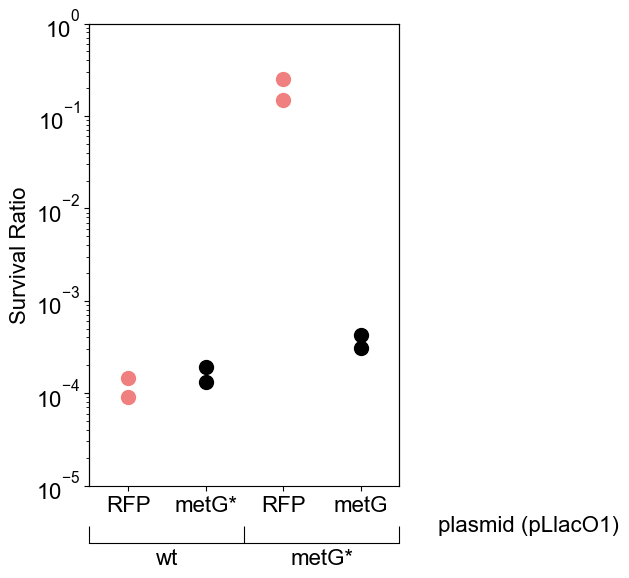

In [7]:
# fig D
# metG complementation, amp + cipro 4 hours
colors = ['lightcoral','k','lightcoral','k']
table = pd.read_csv('source_data/included/metG_complementation.csv',sep=',',index_col=0)
fig,ax = plt.subplots(figsize=(4,6))
strains = ['SB80','SB118','SB81','SB119']
for i in range(0,len(strains)):
    sub = table.loc[table.index.str.contains(strains[i])]
    err = sub.max() - sub.mean()
    ax.scatter([i]*len(sub),sub,c=colors[i],s=100)
    #ax.errorbar(i,sub.mean(),xerr=None,marker='.',markersize=20,yerr=sub.std(),capsize=8,c=colors[i])
ax.set_yscale('log')
ax.set_ylim(10**(-5),1)
ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['RFP','metG*','RFP','metG'])

ax2 = ax.twiny()
ax2.spines["bottom"].set_position(("axes", -0.125))
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', length=12,direction='in', which='major')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.set_xticks([0,0.5,1])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.25,0.75]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['wt','metG*']))
ax.set_ylabel('Survival Ratio',size=16)
ax.text(4,10**(-5.5),'plasmid (pLlacO1)',ha='left')
plt.savefig('figures/figED9d.pdf')

In [8]:
def calculate_tpr_fpr_for_controlgenes(pos_array, neg_array):
        fpr_ar = []
        tpr_ar = []
        th_ar  = []
        dis_ar = []
        fdr_ar = []
        for pthr in sorted(neg_array+pos_array):
                prc = 1.*sum(ratio <= pthr for ratio in neg_array)/len(neg_array) # counts the number of negatives below the threshold
                size_pos = len(pos_array)
                size_neg = len(neg_array)
                FP = 1.*size_pos*(prc)
                TP = sum(ratio < pthr for ratio in pos_array)
                TPR = 100.*TP/size_pos
                FPR = 100.*FP/size_pos
                FDR = 100.*FP/(FP+TP+0.00001)
                DIS = 100.*(FP+TP)/(size_pos+size_pos)
                tpr_ar.append(TPR)
                fpr_ar.append(FPR)
                th_ar.append(pthr)
                dis_ar.append(DIS)
        #print "#########################################################################################################################################"
        AUC = auc_from_fpr_tpr(np.array(fpr_ar)/100., np.array(tpr_ar)/100.)
        #print "AUC = %.3f" % AUC
        return (th_ar, dis_ar, fpr_ar, tpr_ar, fdr_ar, AUC);
    
def auc_from_fpr_tpr(fpr, tpr):
    fpr  = np.array(fpr)
    tpr  = np.array(tpr)
    inds = [i for (i, (s, e)) in enumerate(zip(fpr[: -1], fpr[1: ])) if s != e] + [len(fpr) - 1]
    #inds = [i for (i, (s, e)) in enumerate(zip(fpr[: -1], fpr[1: ]))] + [len(fpr) - 1]
    fpr, tpr = fpr[inds], tpr[inds]
    area = 0
    ft = list(zip(fpr, tpr))
    for p0, p1 in zip(ft[: -1], ft[1: ]):
            fdx = abs(p1[0]-p0[0])*((p1[1]+p0[1]) / 2.0)
            #print fdx
            area += fdx
    return area


In [9]:
combined = pd.read_csv('source_data/included/fig4_CRISPRi_enrichment.txt',sep='\t',index_col=0)
for rRNA_type in ['rrf','rrl','rrs']:
    LAG = combined.loc[(combined['LAGs'].str.contains(rRNA_type)) & (combined['LAGs'].str.contains('b'))].iloc[0,0]
    to_append = combined.loc[(combined['LAGs'].str.contains(rRNA_type)) & (combined['LAGs'].str.contains('b'))].groupby('strand').mean().reset_index()
    to_append.loc[:,to_append.columns.str.contains('signif')] = np.round(to_append.loc[:,to_append.columns.str.contains('signif')])
    to_append['LAGs'] = [LAG,LAG]
    combined = combined.loc[~((combined['LAGs'].str.contains(rRNA_type)) & (combined['LAGs'].str.contains('b')))]
    combined = combined.append(to_append)
    combined = combined.reset_index().drop('index',axis=1)
    
## define replicates for each sample type
metG_lag = ['SBC210_vs_SBC205','SBC101_vs_SBC96','SBC102_vs_SBC96','SBC100_vs_SBC96','SBC192_vs_SBC191']
MG1655_lag = ['SBC131_vs_SBC126','SBC132_vs_SBC126','SBC130_vs_SBC126']
metG_lag_abx = ['SBC207_vs_SBC210','SBC208_vs_SBC210','SBC209_vs_SBC210','SBC98_vs_SBC101','SBC99_vs_SBC101']
MG1655_lag_abx = ['SBC128_vs_SBC131','SBC129_vs_SBC131']
metG_exp = ['SBC212_vs_SBC211']
MG1655_exp = ['SBC134_vs_SBC133']
hipA7_lag = ['SBC318_vs_SBC316']
hipA7_lag_abx = ['SBC317_vs_SBC318']
wt_YqgE_lag = ['SBC309_vs_SBC308','SBC313_vs_SBC312']
wt_RFP_lag = ['SBC311_vs_SBC310','SBC315_vs_SBC314']
outgrowths = ['SBC96_vs_SBC95','SBC126_vs_SBC125']

## create dictionaries counting the number of over-represented and under-represented instances of each gene in given experiment type
classes = [metG_lag,MG1655_lag,metG_exp,MG1655_exp,metG_lag_abx,MG1655_lag_abx,hipA7_lag,hipA7_lag_abx,wt_YqgE_lag,wt_RFP_lag]
names = ['metG_lag','MG1655_lag','metG_exp','MG1655_exp','metG_lag_abx','MG1655_lag_abx','hipA7_lag','hipA7_lag_abx','wt_YqgE_lag','wt_RFP_lag']
up_dict = {}
down_dict = {}
for c,n in zip(classes,names):
    up = []
    down = []
    for comparison in c:
        if (len(up) == 0) and (len(down) == 0):
            up = (combined['signif_' + comparison] == 1).astype(int)
            down = (combined['signif_' + comparison] == -1).astype(int)
        else:
            up = up + (combined['signif_' + comparison] == 1).astype(int)
            down = down + (combined['signif_' + comparison] == -1).astype(int)
    up_dict[n] = up
    down_dict[n] = down


4422
126


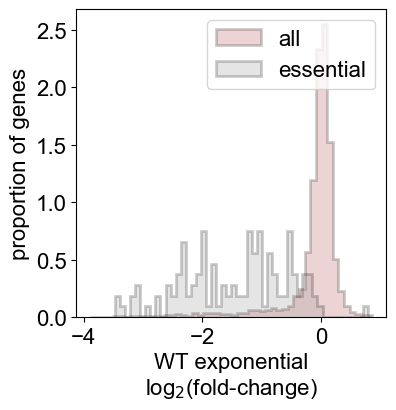

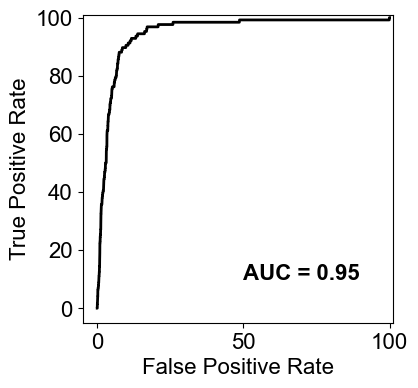

In [10]:
## f - essential gene depletion (exponential wildtype)

table = combined.copy()
table = table.loc[table['strand']=='a']
table.index = table['LAGs'].str.split('=',expand=True)[1]

essential_list = pd.read_csv('source_data/included/ecoli_essential.txt',sep='\t')
essential_list = essential_list.dropna()
check = []
for b_num in table['LAGs'].str.split('=',expand=True)[0]:
    if b_num in essential_list['b-number'].values:
        check.append('e')
    else:
        check.append('ne')
table['essentiality'] = check

essential_list.index = essential_list['b-number']
table.index = table['LAGs'].str.split('=',expand=True)[0]
table = table.merge(essential_list,how='left',left_index=True,right_index=True)

essentiality_condition = (table['Set (sub-set)']=='A2')  ## A2 is most stringent set of essential genes
table['log2fc'] = table.loc[:,['enrichment_' + c for c in MG1655_exp]].mean(axis=1)
table['essentiality'] = essentiality_condition
table = table.loc[table['log2fc']!=0]
essentiality_condition = table['essentiality']
table = table['log2fc']
fig,ax = plt.subplots(figsize=(4,4))
ax.hist(table,bins=50,log=False,histtype='step',linewidth=2,edgecolor='black',facecolor='brown',density=True,fill=True,alpha=0.2,label='all');
ax.hist(table[essentiality_condition],bins=50,histtype='step',linewidth=2,edgecolor='black',facecolor='grey',fill=True,density=True,alpha=0.2,label='essential');
ax.legend()
ax.set_ylabel('proportion of genes',size=16)
ax.set_xlabel('WT exponential\nlog' + '$_{2}$' + '(fold-change)',size=16)
plt.savefig('figures/figED8f_left.pdf')

pos_array = list(table[essentiality_condition])
neg_array = list(table[~essentiality_condition])
pos_array.sort()
neg_array.sort()

roc_array      = calculate_tpr_fpr_for_controlgenes(pos_array, neg_array);
fig,ax = plt.subplots(figsize=(4,4))
ax.plot(roc_array[2],roc_array[3],linewidth=2,color='k')
ax.set_ylim(-5,101)
ax.set_xlim(-5,101)
ax.text(50,10,'AUC = ' + str(np.round(roc_array[5],2)),size=16,color='k',fontweight='bold')
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('True Positive Rate',size=16)
ax.set_xlabel('False Positive Rate',size=16)
plt.savefig('figures/figED9f_right.pdf')

print(len(table))
print(len(table[essentiality_condition]))

df = pd.DataFrame(table)
df['essential'] = essentiality_condition
df.to_csv('source_data/source_tables/figED9f.csv')

4408
126


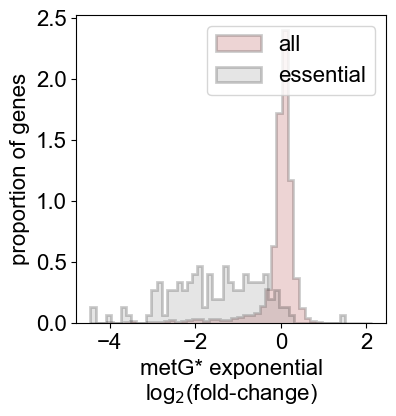

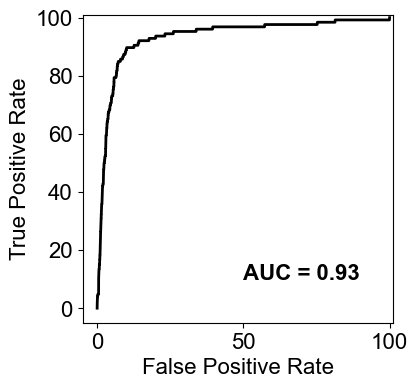

In [11]:
## g - essential gene depletion (exponential metG*)

table = combined.copy()
table = table.loc[table['strand']=='a']
table.index = table['LAGs'].str.split('=',expand=True)[1]

essential_list = pd.read_csv('source_data/included/ecoli_essential.txt',sep='\t')
essential_list = essential_list.dropna()
check = []
for b_num in table['LAGs'].str.split('=',expand=True)[0]:
    if b_num in essential_list['b-number'].values:
        check.append('e')
    else:
        check.append('ne')
table['essentiality'] = check

essential_list.index = essential_list['b-number']
table.index = table['LAGs'].str.split('=',expand=True)[0]
table = table.merge(essential_list,how='left',left_index=True,right_index=True)

essentiality_condition = (table['Set (sub-set)']=='A2')  ## A2 is most stringent set of essential genes
table['log2fc'] = table.loc[:,['enrichment_' + c for c in metG_exp]].mean(axis=1)
table['essentiality'] = essentiality_condition
table = table.loc[table['log2fc']!=0]
essentiality_condition = table['essentiality']
table = table['log2fc']
fig,ax = plt.subplots(figsize=(4,4))
ax.hist(table,bins=50,log=False,histtype='step',linewidth=2,edgecolor='black',facecolor='brown',density=True,fill=True,alpha=0.2,label='all');
ax.hist(table[essentiality_condition],bins=50,histtype='step',linewidth=2,edgecolor='black',facecolor='grey',fill=True,density=True,alpha=0.2,label='essential');
ax.legend()
ax.set_ylabel('proportion of genes',size=16)
ax.set_xlabel('metG* exponential\nlog' + '$_{2}$' + '(fold-change)',size=16)
plt.savefig('figures/figED9g_left.pdf')

pos_array = list(table[essentiality_condition])
neg_array = list(table[~essentiality_condition])
pos_array.sort()
neg_array.sort()

roc_array      = calculate_tpr_fpr_for_controlgenes(pos_array, neg_array);
fig,ax = plt.subplots(figsize=(4,4))
ax.plot(roc_array[2],roc_array[3],linewidth=2,color='k')
ax.set_ylim(-5,101)
ax.set_xlim(-5,101)
ax.text(50,10,'AUC = ' + str(np.round(roc_array[5],2)),size=16,color='k',fontweight='bold')
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_ylabel('True Positive Rate',size=16)
ax.set_xlabel('False Positive Rate',size=16)
plt.savefig('figures/figED9g_right.pdf')
print(len(table))
print(len(table[essentiality_condition]))

df = pd.DataFrame(table)
df['essential'] = essentiality_condition
df.to_csv('source_data/source_tables/figED9g.csv')

SpearmanrResult(correlation=0.8700393510137259, pvalue=3.1468470635044425e-177)
572


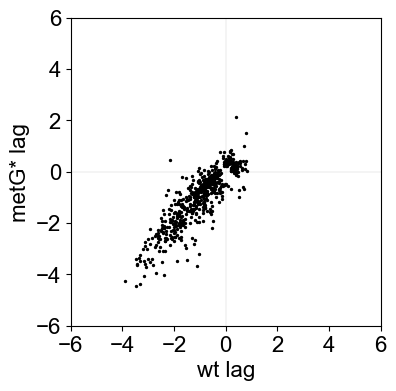

In [12]:
## h
## correlation between WT exponential and metG exponential CRISPRi
## select genes that are significantly enriched in one of the samples and above read threshold in both samples
rows = ((combined[['enrichment_' + c for c in MG1655_exp + metG_exp]]==0).sum(axis=1)==0) & ((combined[['signif_' + c for c in MG1655_exp + metG_exp]]!=0).sum(axis=1)>0)
x = combined.loc[rows,['enrichment_' + c for c in MG1655_exp]].mean(axis=1)
y = combined.loc[rows,['enrichment_' + c for c in metG_exp]].mean(axis=1)
fig,ax = plt.subplots(figsize=(4,4))
ax.scatter(x,y,s=2,color='k')
print(st.spearmanr(x,y))
ax.set_xlabel('WT exponential\nlog' + '$_{2}$' + '(fold-change)',size=16)
ax.set_ylabel('metG* exponential\nlog' + '$_{2}$' + '(fold-change)',size=16)
print(len(x))

ax.set_xlim(-6,5)
ax.set_ylim(-6,5)
ax.axhline(0,color='k',alpha=0.2,linewidth=0.3)
ax.axvline(0,color='k',alpha=0.2,linewidth=0.3)

ax.set_ylabel('metG* lag')
ax.set_xlabel('wt lag')
ax.set_xticks([-6,-4,-2,0,2,4,6])
ax.set_yticks([-6,-4,-2,0,2,4,6])

plt.savefig('figures/figED9h.pdf')

df = pd.DataFrame([combined.loc[rows,'LAGs'],combined.loc[rows,'strand'],x,y]).transpose()
df.columns = ['gene','strand','WT exponential log2FC','metG* exponential log2FC']
df.to_csv('source_data/source_tables/figED9h.csv',index=False)

7.548407103883463e-05


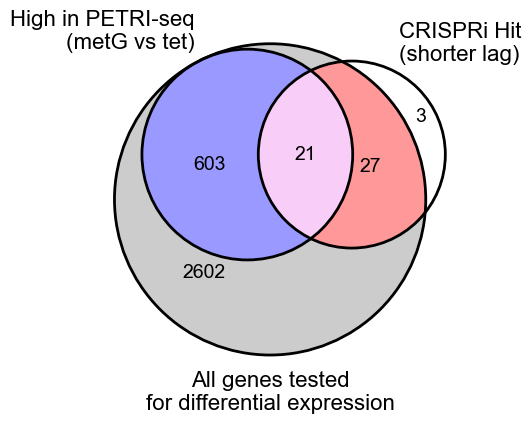

In [13]:
## define gene set metG lag UP
metG_lag_up = (up_dict['metG_lag']>=2)
condition_set = metG_lag_up
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in metG_lag]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in metG_lag]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
metG_lag_LAGs_list = LAGs_list

## define genes significantly enriched in metG persister cells (PETRI-seq) vs. tetracycline-treated cells
gene_list = pd.read_csv('source_data/generated/metG_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)

## count gene groups for venn diagram
M = len(gene_list)
sub = gene_list.reindex(labels=LAGs_list.str.split('=',expand=True)[1].values).dropna()
N = len(sub)
x = len(sub.loc[sub['fixed_signif']==1])
n = len(gene_list.loc[gene_list['fixed_signif']==1])
print(st.hypergeom.sf(x-1, M, n, N)) # hypergeometric test

## plot venn diagram
fig,ax = plt.subplots(figsize=(5,5))
sets = (0, np.log10(len(LAGs_list)-N), 0, np.log10(M-n-N+x), np.log10(n-x), np.log10(N-x), np.log10(x))
set_labels = ('High in PETRI-seq\n(metG vs tet)', 'CRISPRi Hit\n(shorter lag)','All genes tested\nfor differential expression')
v = venn3(subsets = sets,set_labels=set_labels)

## venn diagram formatting
c = venn3_circles(subsets=sets, linestyle='solid')
v.get_label_by_id('010').set_text(len(LAGs_list)-N)
v.get_label_by_id('001').set_text(M-n-N+x)
v.get_label_by_id('101').set_text(n-x)
v.get_label_by_id('011').set_text(N-x)
v.get_label_by_id('111').set_text(x)
v.get_patch_by_id('010').set_color('white')
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('111').set_color('violet')
v.get_patch_by_id('101').set_color('blue')
v.get_patch_by_id('011').set_color('red')
for text in v.set_labels:
    text.set_fontsize(16)
for text in v.subset_labels:
    if text is not None:
        text.set_fontsize(14)
plt.savefig('figED9j.pdf')


0.002732306726112646


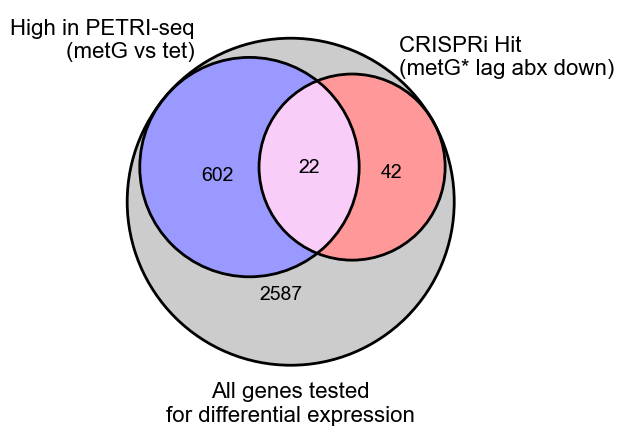

In [14]:
## metG lag abx vs PETRI hits

## define gene set metG lag abx DOWN
metG_lag_abx_down = (down_dict['metG_lag_abx']>=2)
condition_set = metG_lag_abx_down
key_comparison = metG_lag_abx

temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in key_comparison]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in key_comparison]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
metG_lag_abx_LAGs_list = LAGs_list

## define genes significantly enriched in metG persister cells (PETRI-seq) vs. tetracycline-treated cells
gene_list = pd.read_csv('source_data/generated/metG_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)

## count gene groups for venn diagram
M = len(gene_list)
sub = gene_list.reindex(labels=LAGs_list.str.split('=',expand=True)[1].values).dropna()
N = len(sub)
x = len(sub.loc[sub['fixed_signif']==1])
n = len(gene_list.loc[gene_list['fixed_signif']==1])
print(st.hypergeom.sf(x-1, M, n, N)) # hypergeometric test

## plot venn diagram
fig,ax = plt.subplots(figsize=(5,5))
sets = (0, 0, 0, np.log10(M-n-N+x), np.log10(n-x), np.log10(N-x), np.log10(x))
set_labels = ('High in PETRI-seq\n(metG vs tet)', 'CRISPRi Hit\n(metG* lag abx down)','All genes tested\nfor differential expression')
v = venn3(subsets = sets,set_labels=set_labels)

## venn diagram formatting
c = venn3_circles(subsets=sets, linestyle='solid')
v.get_label_by_id('001').set_text(M-n-N+x)
v.get_label_by_id('101').set_text(n-x)
v.get_label_by_id('011').set_text(N-x)
v.get_label_by_id('111').set_text(x)
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('111').set_color('violet')
v.get_patch_by_id('101').set_color('blue')
v.get_patch_by_id('011').set_color('red')
for text in v.set_labels:
    text.set_fontsize(16)
for text in v.subset_labels:
    if text is not None:
        text.set_fontsize(14)
plt.savefig('figures/figED9k.pdf')

0.00020726774184121437
0.0026596231760580773
2.75729979727505e-41


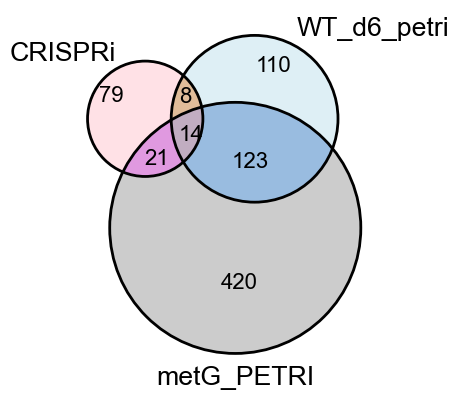

In [15]:
comparison1 = 'CRISPRi'

## define gene set MG1655 lag UP
MG1655_lag_up = (up_dict['MG1655_lag']>=2) 
condition_set = MG1655_lag_up
key_comparison = MG1655_lag
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in key_comparison]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in key_comparison]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
MG1655_lag_LAGs_list = LAGs_list
LAGs_list = pd.DataFrame([1]*len(LAGs_list),LAGs_list.str.split('=',expand=True)[1],[comparison1])

comparison2 = 'WT_d6_petri'
gene_list = pd.read_csv('source_data/generated/WT_d6_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)
gene_list = gene_list.merge(LAGs_list,left_index=True,right_index=True,how='outer')
gene_list[comparison1] = gene_list[comparison1].fillna(0)
all_signif = gene_list[['fixed_signif',comparison1]]
all_signif.columns = [[comparison2,comparison1]]

comparison3 = 'metG_PETRI'
gene_list = pd.read_csv('source_data/generated/metG_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)
all_signif = all_signif.merge(gene_list['fixed_signif'],left_index=True,right_index=True,how='outer')
all_signif.columns = [comparison2,comparison1,comparison3]
all_signif = all_signif.dropna()

n_all = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])
n_1 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]!=1)])
n_2 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_1_2 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_1_3 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_2_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])


M = len(all_signif)
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_2 + n_1_2 + n_2_3 + n_all
x = n_1_2 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(all_signif)
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_1_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(all_signif)
N = n_2 + n_1_2 + n_2_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_2_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))


## plot venn diagram; colors changed in illustrator
sets = (n_1,n_2,n_1_2,n_3,n_1_3,n_2_3,n_all)
v=venn3(subsets = sets, set_labels = (comparison1, comparison2, comparison3))
c = venn3_circles(subsets=sets, linestyle='solid')

v.get_patch_by_id('010').set_color('lightblue')
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('100').set_color('lightpink')

plt.savefig('figures/figED9l.pdf')

1.0629051255514655e-05
1.036470507933148e-06
2.75729979727505e-41


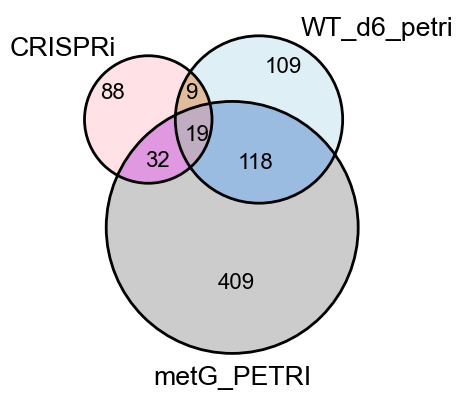

In [16]:
comparison1 = 'CRISPRi'

## define gene set MG1655 lag abx DOWN
MG1655_lag_abx_down = (down_dict['MG1655_lag_abx']>=2)
condition_set = MG1655_lag_abx_down
key_comparison = MG1655_lag_abx
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in key_comparison]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in key_comparison]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
MG1655_lag_abx_LAGs_list = LAGs_list
LAGs_list = pd.DataFrame([1]*len(LAGs_list),LAGs_list.str.split('=',expand=True)[1],[comparison1])

comparison2 = 'WT_d6_petri'
gene_list = pd.read_csv('source_data/generated/WT_d6_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)
gene_list = gene_list.merge(LAGs_list,left_index=True,right_index=True,how='outer')
gene_list[comparison1] = gene_list[comparison1].fillna(0)
all_signif = gene_list[['fixed_signif',comparison1]]
all_signif.columns = [[comparison2,comparison1]]

comparison3 = 'metG_PETRI'
gene_list = pd.read_csv('source_data/generated/metG_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)
all_signif = all_signif.merge(gene_list['fixed_signif'],left_index=True,right_index=True,how='outer')
all_signif.columns = [comparison2,comparison1,comparison3]
all_signif = all_signif.dropna()

n_all = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])
n_1 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]!=1)])
n_2 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_1_2 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_1_3 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_2_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])


M = len(all_signif)
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_2 + n_1_2 + n_2_3 + n_all
x = n_1_2 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(all_signif)
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_1_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(all_signif)
N = n_2 + n_1_2 + n_2_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_2_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))


## plot venn diagram; colors changed in illustrator
sets = (n_1,n_2,n_1_2,n_3,n_1_3,n_2_3,n_all)
v=venn3(subsets = sets, set_labels = (comparison1, comparison2, comparison3))
c = venn3_circles(subsets=sets, linestyle='solid')

v.get_patch_by_id('010').set_color('lightblue')
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('100').set_color('lightpink')

plt.savefig('figures/figED9m.pdf')

0.2247957089806041
0.017527669649325426
1.1113585342280325e-87


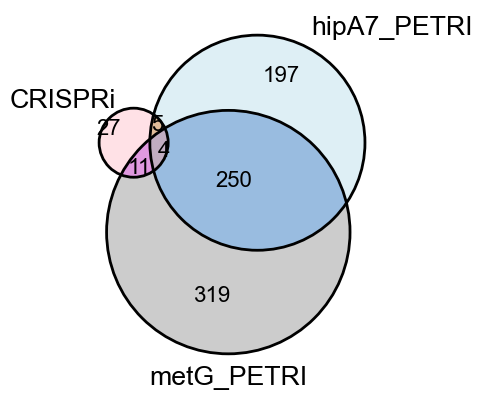

In [17]:
## hipA7 lag vs PETRI hits

comparison1 = 'CRISPRi'

## define gene set hipA7 lag UP
hipA7_lag_up = (up_dict['hipA7_lag']>=1) 
condition_set = hipA7_lag_up
key_comparison = hipA7_lag
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in key_comparison]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in key_comparison]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
hipA7_lag_LAGs_list = LAGs_list
LAGs_list = pd.DataFrame([1]*len(LAGs_list),LAGs_list.str.split('=',expand=True)[1],[comparison1])

comparison2 = 'hipA7_PETRI'
gene_list = pd.read_csv('source_data/generated/hipA7_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)
gene_list = gene_list.merge(LAGs_list,left_index=True,right_index=True,how='outer')
gene_list[comparison1] = gene_list[comparison1].fillna(0)
all_signif = gene_list[['fixed_signif',comparison1]]
all_signif.columns = [[comparison2,comparison1]]

comparison3 = 'metG_PETRI'
gene_list = pd.read_csv('source_data/generated/metG_vs_tet_markers_for_fig3.txt',sep='\t',index_col=0) # saved in fig3_persister_only.R
gene_list.index = gene_list['Row.names']
gene_list = gene_list.drop('Row.names',axis=1)
gene_list['less'] = -gene_list['less']
signed_p = []
for h,l in zip(gene_list['greater'],gene_list['less']):
    if abs(h)<=abs(l):
        signed_p.append(h + (10**-300))
    elif abs(l)<abs(h):
        signed_p.append(l - (10**-300))
    else:
        print('error')
gene_list['signed_p'] = signed_p
gene_list['fixed_signif'] = (abs(gene_list['signed_p']).sort_values()<0.05*np.arange(1,len(gene_list)+1)/len(gene_list)).astype(int)
gene_list['fixed_signif'] = (gene_list['fixed_signif'] * (gene_list['signed_p']/abs(gene_list['signed_p']))).astype(int)
all_signif = all_signif.merge(gene_list['fixed_signif'],left_index=True,right_index=True,how='outer')
all_signif.columns = [comparison2,comparison1,comparison3]
all_signif = all_signif.dropna()

n_all = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])
n_1 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]!=1)])
n_2 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_1_2 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_1_3 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_2_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])


M = len(all_signif)
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_2 + n_1_2 + n_2_3 + n_all
x = n_1_2 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(all_signif)
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_1_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(all_signif)
N = n_2 + n_1_2 + n_2_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_2_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))


## plot venn diagram; colors changed in illustrator
sets = (n_1,n_2,n_1_2,n_3,n_1_3,n_2_3,n_all)
v=venn3(subsets = sets, set_labels = (comparison1, comparison2, comparison3))
c = venn3_circles(subsets=sets, linestyle='solid')

v.get_patch_by_id('010').set_color('lightblue')
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('100').set_color('lightpink')

plt.savefig('figures/figED9n.pdf')

4.4872102254886955e-20


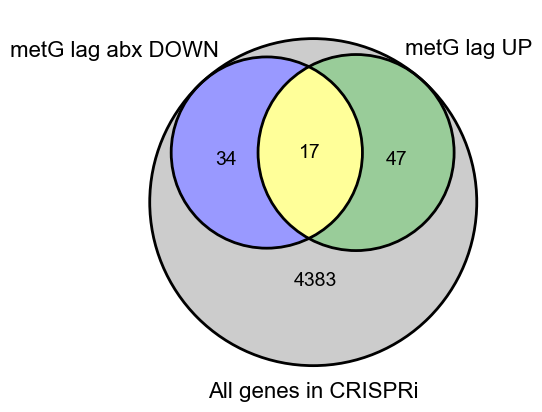

In [18]:
LAGs_list1 = metG_lag_LAGs_list
LAGs_list2 = metG_lag_abx_LAGs_list

## count gene groups for venn diagram
M = len(combined['LAGs'].drop_duplicates())
N = len(LAGs_list2)
intersect = [i in LAGs_list1.values for i in LAGs_list2]
x = sum(intersect)
n = len(LAGs_list1)
print(st.hypergeom.sf(x-1, M, n, N))

## plot venn diagram
fig,ax = plt.subplots(figsize=(5,5))
sets = (0, 0, 0, np.log10(M-n-N+x), np.log10(n-x), np.log10(N-x), np.log10(x))
set_labels = ('metG lag abx DOWN', 'metG lag UP','All genes in CRISPRi')
v = venn3(subsets = sets,set_labels=set_labels)

## venn diagram formatting
c = venn3_circles(subsets=sets, linestyle='solid')
v.get_label_by_id('001').set_text(M-n-N+x)
v.get_label_by_id('101').set_text(n-x)
v.get_label_by_id('011').set_text(N-x)
v.get_label_by_id('111').set_text(x)
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('111').set_color('yellow')
v.get_patch_by_id('101').set_color('blue')
v.get_patch_by_id('011').set_color('green')
for text in v.set_labels:
    text.set_fontsize(16)
for text in v.subset_labels:
    if text is not None:
        text.set_fontsize(14)
plt.savefig('figures/figED9o.pdf')

1.6315150479025938e-75


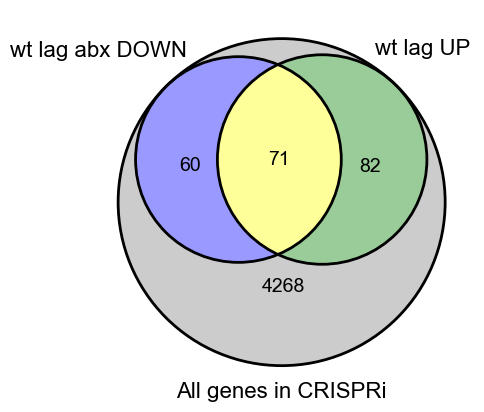

In [19]:
## define gene sets

LAGs_list1 = MG1655_lag_LAGs_list
LAGs_list2 = MG1655_lag_abx_LAGs_list

## count gene groups for venn diagram
M = len(combined['LAGs'].drop_duplicates())
N = len(LAGs_list2)
intersect = [i in LAGs_list1.values for i in LAGs_list2]
x = sum(intersect)
n = len(LAGs_list1)
print(st.hypergeom.sf(x-1, M, n, N))

## plot venn diagram
fig,ax = plt.subplots(figsize=(5,5))
sets = (0, 0, 0, np.log10(M-n-N+x), np.log10(n-x), np.log10(N-x), np.log10(x))
set_labels = ('wt lag abx DOWN', 'wt lag UP','All genes in CRISPRi')
v = venn3(subsets = sets,set_labels=set_labels)

## venn diagram formatting
c = venn3_circles(subsets=sets, linestyle='solid')
v.get_label_by_id('001').set_text(M-n-N+x)
v.get_label_by_id('101').set_text(n-x)
v.get_label_by_id('011').set_text(N-x)
v.get_label_by_id('111').set_text(x)
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('111').set_color('yellow')
v.get_patch_by_id('101').set_color('blue')
v.get_patch_by_id('011').set_color('green')
for text in v.set_labels:
    text.set_fontsize(16)
for text in v.subset_labels:
    if text is not None:
        text.set_fontsize(14)

plt.savefig('figures/figED9p.pdf')        

9.32118518317764e-15


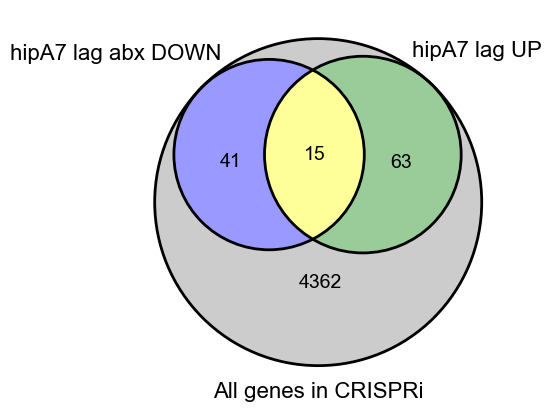

In [20]:
comparison1 = 'CRISPRi'
hipA7_lag_abx_down = (down_dict['hipA7_lag_abx']>=1) 
condition_set = hipA7_lag_abx_down
key_comparison = hipA7_lag_abx

temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in key_comparison]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in key_comparison]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
hipA7_lag_abx_LAGs_list = LAGs_list


## define gene sets
LAGs_list1 = hipA7_lag_LAGs_list
LAGs_list2 = hipA7_lag_abx_LAGs_list

## count gene groups for venn diagram
M = len(combined['LAGs'].drop_duplicates())
N = len(LAGs_list2)
intersect = [i in LAGs_list1.values for i in LAGs_list2]
x = sum(intersect)
n = len(LAGs_list1)
print(st.hypergeom.sf(x-1, M, n, N))

## plot venn diagram
fig,ax = plt.subplots(figsize=(5,5))
sets = (0, 0, 0, np.log10(M-n-N+x), np.log10(n-x), np.log10(N-x), np.log10(x))
set_labels = ('hipA7 lag abx DOWN', 'hipA7 lag UP','All genes in CRISPRi')
v = venn3(subsets = sets,set_labels=set_labels)

## venn diagram formatting
c = venn3_circles(subsets=sets, linestyle='solid')
v.get_label_by_id('001').set_text(M-n-N+x)
v.get_label_by_id('101').set_text(n-x)
v.get_label_by_id('011').set_text(N-x)
v.get_label_by_id('111').set_text(x)
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('111').set_color('yellow')
v.get_patch_by_id('101').set_color('blue')
v.get_patch_by_id('011').set_color('green')
for text in v.set_labels:
    text.set_fontsize(16)
for text in v.subset_labels:
    if text is not None:
        text.set_fontsize(14)
        
plt.savefig('figures/figED9q.pdf')        

8.610905006782953e-18
5.571013219079582e-26
1.1149409433417035e-24


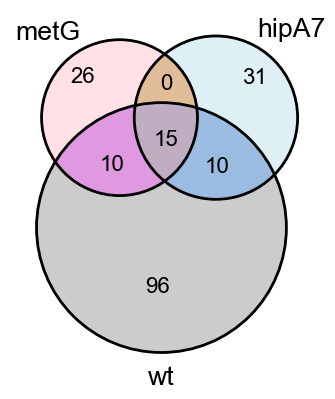

In [21]:
## define gene sets

comparison1 = 'metG'
comparison2 = 'hipA7'
comparison3 = 'wt'

LAGs_list1 = metG_lag_LAGs_list
df1 = pd.DataFrame([1] * len(LAGs_list1),LAGs_list1,[comparison1])

LAGs_list2 = hipA7_lag_LAGs_list
df2 = pd.DataFrame([1] * len(LAGs_list2),LAGs_list2,[comparison2])

LAGs_list3 = MG1655_lag_LAGs_list
df3 = pd.DataFrame([1] * len(LAGs_list3),LAGs_list3,[comparison3])

all_signif = df1.merge(df2,left_index=True,right_index=True,how='outer').merge(df3,left_index=True,right_index=True,how='outer').fillna(0)

n_all = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])
n_1 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]!=1)])
n_2 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_1_2 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]==1) & (all_signif[comparison3]!=1)])
n_1_3 = len(all_signif.loc[(all_signif[comparison1]==1) & (all_signif[comparison2]!=1) & (all_signif[comparison3]==1)])
n_2_3 = len(all_signif.loc[(all_signif[comparison1]!=1) & (all_signif[comparison2]==1) & (all_signif[comparison3]==1)])

## count gene groups for venn diagram
M = len(combined['LAGs'].drop_duplicates())
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_2 + n_1_2 + n_2_3 + n_all
x = n_1_2 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(combined['LAGs'].drop_duplicates())
N = n_1 + n_1_2 + n_1_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_1_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))

M = len(combined['LAGs'].drop_duplicates())
N = n_2 + n_1_2 + n_2_3 + n_all 
n = n_3 + n_1_3 + n_2_3 + n_all
x = n_2_3 + n_all
print(st.hypergeom.sf(x-1, M, n, N))


## plot venn diagram; colors changed in illustrator
sets = (n_1,n_2,n_1_2,n_3,n_1_3,n_2_3,n_all)
v=venn3(subsets = sets, set_labels = (comparison1, comparison2, comparison3))
c = venn3_circles(subsets=sets, linestyle='solid')

v.get_patch_by_id('010').set_color('lightblue')
v.get_patch_by_id('001').set_color('grey')
v.get_patch_by_id('100').set_color('lightpink')
common_lag = set(LAGs_list1).intersection(LAGs_list2).intersection(LAGs_list3)

plt.savefig('figures/figED9i.pdf')

In [22]:
### save source data ###
###### differential expression ######
def get_table(id1,id2,FDR):
    filename = 'source_data/generated/' + id1 + '_vs_' + id2 + '_markers_for_fig3.txt' # saved in fig3_persister_only.R (FindMarkers)
    table = pd.read_csv(filename,sep='\t',index_col=0)
    table.index = table['Row.names']
    table = table.drop('Row.names',axis=1)
    table['less'] = -table['less']
    signed_p = []
    for h,l in zip(table['greater'],table['less']):
        if abs(h)<=abs(l):
            signed_p.append(h + (10**-300))
        elif abs(l)<abs(h):
            signed_p.append(l - (10**-300))
        else:
            print('error')
    table['signed_p'] = signed_p
    table['fixed_signif'] = (abs(table['signed_p']).sort_values()<FDR*np.arange(1,len(table)+1)/len(table)).astype(int)
    table['fixed_signif'] = (table['fixed_signif'] * (table['signed_p']/abs(table['signed_p']))).astype(int)
    return(table[['logFC','signed_p','fixed_signif']])
FDR = 0.05

source_table = get_table('metG','tet',FDR).merge(get_table('hipA7','tet',FDR),left_index=True,right_index=True,how='outer',suffixes=('_metG','_hipA7'))
source_table = source_table.merge(get_table('WT_d6','tet',FDR),left_index=True,right_index=True,how='outer')
source_table.columns = source_table.columns[0:6].append(source_table.columns[6:9] + '_6dayWT')

###### CALM DATA ######
combined = pd.read_csv('source_data/included/fig4_CRISPRi_enrichment.txt',sep='\t',index_col=0)
for rRNA_type in ['rrf','rrl','rrs']:
    LAG = combined.loc[(combined['LAGs'].str.contains(rRNA_type)) & (combined['LAGs'].str.contains('b'))].iloc[0,0]
    to_append = combined.loc[(combined['LAGs'].str.contains(rRNA_type)) & (combined['LAGs'].str.contains('b'))].groupby('strand').mean().reset_index()
    to_append.loc[:,to_append.columns.str.contains('signif')] = np.round(to_append.loc[:,to_append.columns.str.contains('signif')])
    to_append['LAGs'] = [LAG,LAG]
    combined = combined.loc[~((combined['LAGs'].str.contains(rRNA_type)) & (combined['LAGs'].str.contains('b')))]
    combined = combined.append(to_append)
    combined = combined.reset_index().drop('index',axis=1)

## define replicates for each sample type
metG_lag = ['SBC210_vs_SBC205','SBC101_vs_SBC96','SBC102_vs_SBC96','SBC100_vs_SBC96','SBC192_vs_SBC191']
MG1655_lag = ['SBC131_vs_SBC126','SBC132_vs_SBC126','SBC130_vs_SBC126']
metG_lag_abx = ['SBC207_vs_SBC210','SBC208_vs_SBC210','SBC209_vs_SBC210','SBC98_vs_SBC101','SBC99_vs_SBC101']
MG1655_lag_abx = ['SBC128_vs_SBC131','SBC129_vs_SBC131']
metG_exp = ['SBC212_vs_SBC211']
MG1655_exp = ['SBC134_vs_SBC133']
hipA7_lag = ['SBC318_vs_SBC316']
hipA7_lag_abx = ['SBC317_vs_SBC318']

## create dictionaries counting the number of over-represented and under-represented instances of each gene in given experiment type
classes = [metG_lag,MG1655_lag,metG_exp,MG1655_exp,metG_lag_abx,MG1655_lag_abx,hipA7_lag,hipA7_lag_abx]
names = ['metG_lag','MG1655_lag','metG_exp','MG1655_exp','metG_lag_abx','MG1655_lag_abx','hipA7_lag','hipA7_lag_abx']
up_dict = {}
down_dict = {}
for c,n in zip(classes,names):
    up = []
    down = []
    for comparison in c:
        if (len(up) == 0) and (len(down) == 0):
            up = (combined['signif_' + comparison] == 1).astype(int)
            down = (combined['signif_' + comparison] == -1).astype(int)
        else:
            up = up + (combined['signif_' + comparison] == 1).astype(int)
            down = down + (combined['signif_' + comparison] == -1).astype(int)
    up_dict[n] = up
    down_dict[n] = down

condition_set = (up_dict['metG_lag']>=2) ## fig 4f, S14i
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in metG_lag]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in metG_lag]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
metG_lag_up_genes = LAGs_list.copy().str.split('=',expand=True)[1]

condition_set = (down_dict['metG_lag_abx']>=2) ## fig S14e, S14i
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in metG_lag_abx]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in metG_lag_abx]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
metG_lag_abx_down_genes = LAGs_list.copy().str.split('=',expand=True)[1]

condition_set = (up_dict['MG1655_lag']>=2) ## fig S14f, S14j
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in MG1655_lag]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in MG1655_lag]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
MG1655_lag_up_genes = LAGs_list.copy().str.split('=',expand=True)[1]

condition_set = (down_dict['MG1655_lag_abx']>=2) ## fig. S14g, S14j
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in MG1655_lag_abx]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in MG1655_lag_abx]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
MG1655_lag_abx_down_genes = LAGs_list.copy().str.split('=',expand=True)[1]

condition_set = (up_dict['hipA7_lag']>=1) ## fig. S14h, S14k
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in hipA7_lag]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in hipA7_lag]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
hipA7_lag_up_genes = LAGs_list.copy().str.split('=',expand=True)[1]

condition_set = (down_dict['hipA7_lag_abx']>=1) ## fig. S14k
temp = combined.copy()
temp['counts'] = (temp.loc[:,['signif_' + c for c in hipA7_lag_abx]]!=0).sum(axis=1)
temp['mean'] = abs((temp.loc[:,['enrichment_' + c for c in hipA7_lag_abx]]).mean(axis=1))
LAGs_list = temp.sort_values(['counts','mean'],ascending=False).drop_duplicates(subset='LAGs',keep='first')
LAGs_list = LAGs_list.reindex(combined.loc[condition_set].index).dropna().sort_values('mean',ascending=False)['LAGs']
hipA7_lag_abx_down_genes = LAGs_list.copy().str.split('=',expand=True)[1]

source_table = source_table.merge(pd.DataFrame(np.zeros(len(metG_lag_up_genes)),index=metG_lag_up_genes,columns=['metG_lag_UP']) + 1,how='outer',left_index=True,right_index=True)
source_table = source_table.merge(pd.DataFrame(np.zeros(len(metG_lag_abx_down_genes)),index=metG_lag_abx_down_genes,columns=['metG_lag_abx_DOWN']) + 1,how='outer',left_index=True,right_index=True)
source_table = source_table.merge(pd.DataFrame(np.zeros(len(MG1655_lag_up_genes)),index=MG1655_lag_up_genes,columns=['wildtype_lag_UP']) + 1,how='outer',left_index=True,right_index=True)
source_table = source_table.merge(pd.DataFrame(np.zeros(len(MG1655_lag_abx_down_genes)),index=MG1655_lag_abx_down_genes,columns=['wildtype_lag_abx_DOWN']) + 1,how='outer',left_index=True,right_index=True)
source_table = source_table.merge(pd.DataFrame(np.zeros(len(hipA7_lag_up_genes)),index=hipA7_lag_up_genes,columns=['hipA7_lag_UP']) + 1,how='outer',left_index=True,right_index=True)
source_table = source_table.merge(pd.DataFrame(np.zeros(len(hipA7_lag_abx_down_genes)),index=hipA7_lag_abx_down_genes,columns=['hipA7_lag_abx_DOWN']) + 1,how='outer',left_index=True,right_index=True)

source_table['metG_lag_UP'] = source_table['metG_lag_UP'].fillna(0)
source_table['metG_lag_abx_DOWN'] = source_table['metG_lag_abx_DOWN'].fillna(0)
source_table['wildtype_lag_UP'] = source_table['wildtype_lag_UP'].fillna(0)
source_table['wildtype_lag_abx_DOWN'] = source_table['wildtype_lag_abx_DOWN'].fillna(0)
source_table['hipA7_lag_UP'] = source_table['hipA7_lag_UP'].fillna(0)
source_table['hipA7_lag_abx_DOWN'] = source_table['hipA7_lag_abx_DOWN'].fillna(0)

source_table.to_csv('source_data/source_tables/ED9ijklmnopq.csv',sep=',')
